In [15]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import itertools

from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import datasets

from pylab import rcParams
rcParams['figure.figsize']= 10,5

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import log_loss

## Step 1: Open dataset and only select those faces for which we have 70 or more images.

In [5]:
lfw = datasets.fetch_lfw_people(min_faces_per_person = 70, resize= .4, data_home = "datasets")

In [ ]:
lfw.data.shape

## Step 2: Print a few of the faces to familiarized yourself with the data.

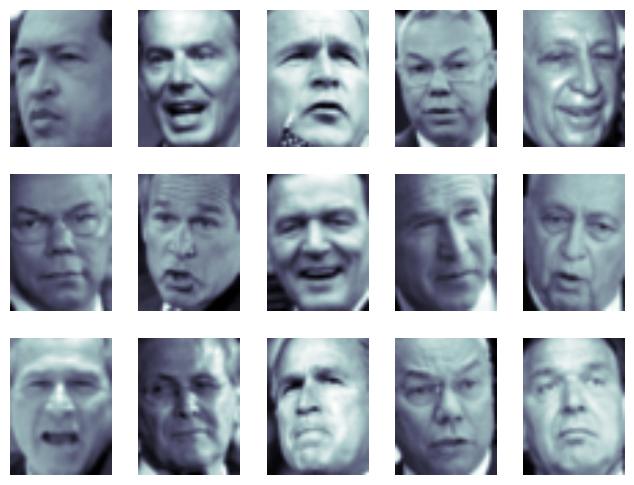

In [7]:
fig = plt.figure(figsize = (8,6))

for i in range(15):
    ax = fig.add_subplot(3,5, i+1, xticks=[], yticks=[])
    ax.imshow(lfw.images[i], cmap=plt.cm.bone)        

## Step 3: Graph the different labels vs their count.

<Container object of 7 artists>

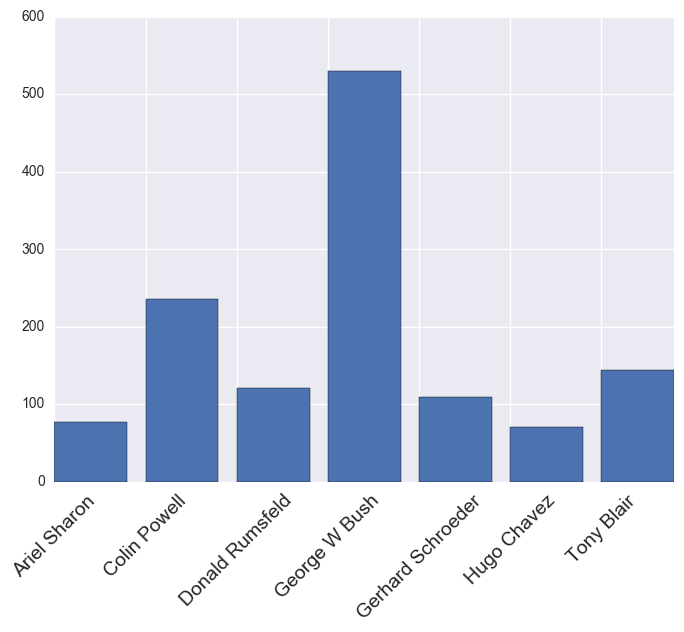

In [12]:
plt.figure(figsize = (8,6))

unique_targets = np.unique(lfw.target)
counts = [(lfw.target ==i).sum() for i in unique_targets]

plt.xticks(unique_targets, lfw.target_names[unique_targets])

locs, labels = plt.xticks()
plt.setp(labels, rotation = 45,size=14)
plt.bar(unique_targets, counts)


## Step 4: Notice that the number of features in our dataset is fairly large. This is a good moment to apply PCA to reduce the dimensionality of our dataset. Lets choose 150 components.

In [22]:
X_train, X_test, y_train, y_test= train_test_split(lfw.data, lfw.target, random_state=0)

In [21]:
X_train.shape

(966, 1850)

In [23]:
pca = PCA(n_components = 150, svd_solver = "randomized", whiten = True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

## Step 5: A really cool thing about PCA is that it lets you compute the mean of each entry which we can then use to obtain the 'average' face in our dataset.

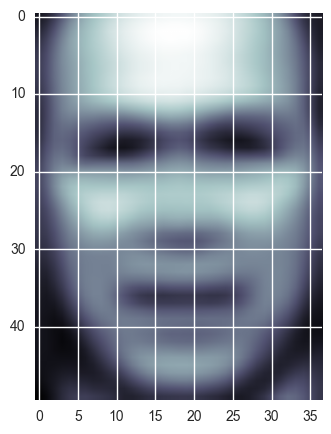

In [25]:
plt.imshow(pca.mean_.reshape((50,37)), cmap =plt.cm.bone)

## Step 6: Plot the components of the PCA. Notice that these are always ordered by importance.

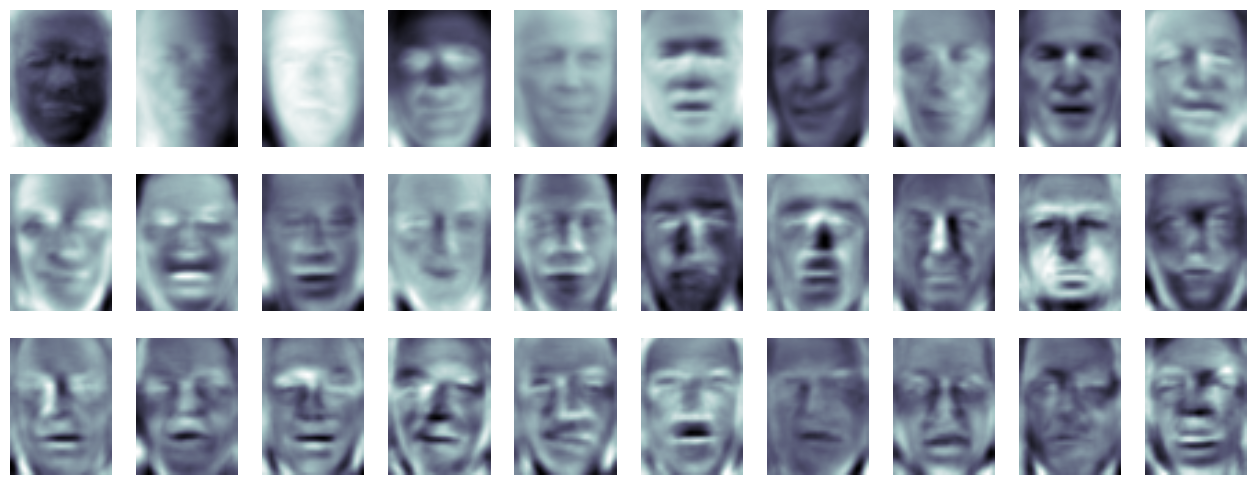

In [30]:
fig = plt.figure(figsize = (16,6))

for i in range(30):
    ax = fig.add_subplot(3,10, i+1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape((50,37)), cmap =plt.cm.bone)
    

# Exercise 2:

### Logistic Regression

In [31]:
lr = LogisticRegression()
lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

0.77950310559006208

### kNeighbors Classifier

In [34]:
a=0
score = 0

for i in range(2, 10):
    knc = KNeighborsClassifier(n_neighbors= i)
    knc.fit(X_train_pca, y_train)
    temp = knc.score(X_test_pca, y_test)
    if temp > score:
        a= i
        score = temp
print(KNeighborsClassifier(n_neighbors = a))                        
    

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')


### Linear Discriminant

In [36]:
LD = LinearDiscriminantAnalysis()
LD.fit(X_train_pca, y_train)
LD.score(X_test_pca, y_test)

0.82608695652173914

### Naive Bayes

In [39]:
nb = GaussianNB()
nb.fit(X_train_pca, y_train)
nb.score(X_test_pca, y_test)    

0.69254658385093171

### Part 2: Which one had the best performance? Which one had the worst performance?

In [ ]:
# LD > Best ...NB > Worst

### Part 3: Any idea why the score on the top two differs so drastically from the last two?

In [58]:
# Linear solutions seem to work better. 

### Part 4: Find the log_loss, precision, recall, f_score of the best model.

In [ ]:
precision_recall_fscore_support(y_test, LD.predict(X_test_pca) average="weighted")

### Part 5: Plot the Confusion Matrix of the best model.

Da Confusion Matrix


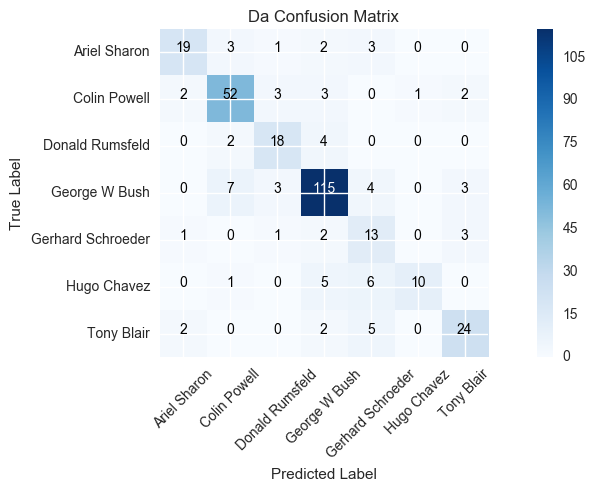

In [57]:
y_pred= lr.predict(X_test_pca)
class_names = lfw.target_names


def plot_confusion_matrix(cm, classes, title = "Da Confusion Matrix", cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation =45)
    plt.yticks(tick_marks, classes)
    
    print("Da Confusion Matrix")
    
    thresh = cm.max()/2
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment= "center", color = "white"  if cm[i,j]> thresh else "black")
                
        plt.tight_layout()
        plt.ylabel("True Label")
        plt.xlabel("Predicted Label")
                
cnf_matrix = confusion_matrix(y_test, y_pred)        
np.set_printoptions(precision= 2)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes= class_names, title = "Da Confusion Matrix")
plt.show()    

## Part 6 (optional): Edit the code from *Step 2* to display not only the image but also the label and color code the label in red if your model got it wrong or black if it got it right.